# 主成分分析

將所有的特徵投影到線上，投影到線上的點的離散程度要盡可能的大，該線即為最佳解。再利用所求得的特徵向量將原始特徵做轉換，轉換成新的特徵(也就是主成分)。再利用特徵值(可以解釋原始資料多少%的變異量)來決定要用多少個主成分。

> PCA好處是可以降低資料維度，避免原始特徵維度過多導致Overfitting。特徵數量下降也可以提升整體模型速度。

## 觀察鳶尾花資料集

共有150筆資料，4種特徵。反應變數是3種不同的花

In [1]:
#載入資料
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
#建立特徵與反應變數
iris_X, iris_y = iris.data, iris.target

In [4]:
#觀察反應變數的花名
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#觀察特徵名稱
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
#將反應變化，花名稱轉換成label
label_dict = {i: k for i, k in enumerate(iris.target_names)}

In [7]:
#繪圖function
def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    
    for label, marker, color in zip(range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[:, 0].real[y == label],
                   y=X[:,1].real[y == label],
                   color=color,
                   alpha=0.5,
                   label=label_dict[label])
        
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        leg = plt.legend(loc='upper right', fancybox=True)
        leg.get_frame().set_alpha(0.5)
        plt.title(title)

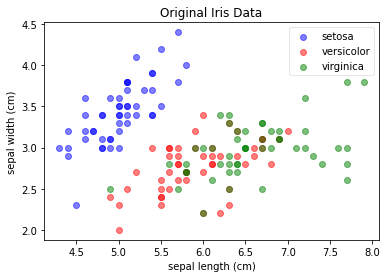

In [8]:
#其中兩個特徵為X軸與Y軸，繪製三個不同分類目標的散佈圖
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

## 手動計算PCA

__步驟如下__
1. 建立資料集的「共變異數矩陣」
2. 計算「共變異數矩陣」的「特徵值」(eigenvalues)
3. 保留「前k個特徵值」(按特徵值降冪排列)
4. 用保留的「特徵向量」(eigenvectors)轉換新的資料點

### 1. 建立資料集的「共變異數矩陣」

In [9]:
import numpy as np

In [10]:
#計算平均值向量，四個特徵各自的平均值
mean_vector = iris_X.mean(axis=0)
print(mean_vector)

[5.84333333 3.05733333 3.758      1.19933333]


In [11]:
#計算共變異數矩陣(covariance matrix)
cov_mat = np.cov((iris_X).T)
print(cov_mat)
print(cov_mat.shape)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
(4, 4)


### 2. 計算「共變異數矩陣」的「特徵值」(eigenvalues)

>所求出的特徵向量(eigenvector)其實就是W，而特徵值(eigenvalue)則表示這一個特徵向量轉換後的資料z(主成分)可以解釋原始特徵多少，能解釋越多表示該主成分越好。

numpy可以根據共變異數矩陣計算出特徵向量與特徵值

In [12]:
#numpy可以直接計算特徵向量與特徵值
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
print(eig_val_cov)
print(eig_vec_cov)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [13]:
#按照降冪印出特徵向量和相對應的特徵值
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i]
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(30*'-')

Eigenvector 1: 
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue 1 from covariance matrix: 4.228241706034863
------------------------------
Eigenvector 2: 
[-0.65658877 -0.73016143  0.17337266  0.07548102]
Eigenvalue 2 from covariance matrix: 0.2426707479286339
------------------------------
Eigenvector 3: 
[-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue 3 from covariance matrix: 0.07820950004291913
------------------------------
Eigenvector 4: 
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]
Eigenvalue 4 from covariance matrix: 0.023835092973449178
------------------------------


### 3.保留「前k個特徵值」(按特徵值降冪排列)

>我們要看每一個特徵向量他能解釋所有資料的特徵值的「百分比」。這個「百分比」就表示該特徵向量轉換後的結果可以解釋整體資料的多少百分比

In [14]:
#每個主成分解釋的百分比是特徵值除以特徵值之和
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, '% of Variance Explained <= k')

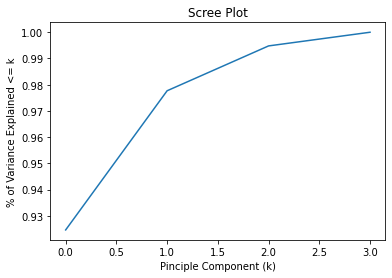

In [15]:
#利用「碎石圖」繪製主成分的百分比變化
#np.cumsum(explained_variance_ratio)) > 逐漸增加各項數值 > [0.92461872 0.97768521 0.99478782 1.]
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Pinciple Component (k)')
plt.ylabel('% of Variance Explained <= k')

> 可以觀察到前兩個主成分所轉換出來的資料就占原始變異數將近98%，意味著幾乎可以用「前兩個特徵向量」作為新的主成分。如此就可以將「資料集」縮小乘一半，而且保持了特徵的完整性、加速效能。 

### 4.用保留的「特徵向量」(eigenvectors)轉換新的資料點
將所有的資料依照我們的特徵向量做inner product，就可以得到兩個新的資料點

In [16]:
#保存兩個特徵向量
print(eig_vec_cov)
print()
top_2_eigenvectors = eig_vec_cov[:, :2].T
print(top_2_eigenvectors)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]


In [17]:
#資料轉換，將150x4改變成150x2
np.dot(iris_X, top_2_eigenvectors.T)

#列出前五個
np.dot(iris_X, top_2_eigenvectors.T)[:5,]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

## scikit-learn的PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
#模仿前面的操作過程，實體兩個主成分的PCA
pca = PCA(n_components=2)

In [20]:
#利用PCA擬合資料
pca.fit(iris_X)

PCA(n_components=2)

In [21]:
#檢視特徵向量與之前的是否相同
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [22]:
#將「資料」投影到「新的二維平面」上
pca.transform(iris_X)[:5,]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

> 這邊投影後的資料跟先前的不同，原因是scikit-learn的PCA會在「預測」時自動將資料「中心化」，進而改變結果

In [23]:
#利用之前的手動作法去中心化
#其實就是將資料先減掉平均值再去乘上特徵向量
np.dot(iris_X-mean_vector, top_2_eigenvectors.T)[:5, ]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451]])

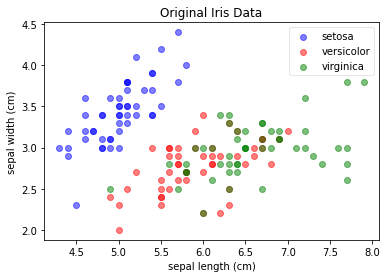

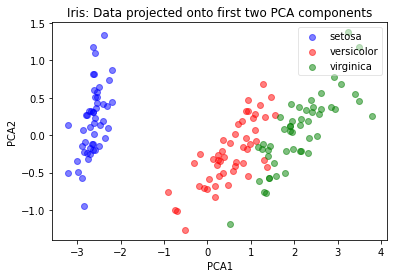

In [24]:
#繪製資料集做PCA前後的資料分佈
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")
plt.show()

plot(pca.transform(iris_X), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

> 做完PCA的資料點滿明確的有被分開

In [25]:
#提取每個主成分解釋的變異數量
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 主成分之間線性「無」關

我們會希望所得到的所有「主成分」都是相互垂直(perpendicular)，意思就是彼此線性無關。我們將觀察原始四個特徵彼此之間的相關性以及做PCA後的「主成分」之間的相關性

In [26]:
#原始相關性
np.corrcoef(iris_X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [27]:
#取對角線上的相關係數
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]]

array([-0.11756978,  0.87175378,  0.81794113, -0.4284401 , -0.36612593])

In [28]:
#計算原始資料集的平均相關性
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

#還是有相關

0.15551181623163549

In [29]:
#主成分相關性
#取所有主成分
full_pca = PCA(n_components=4)

#擬合資料
full_pca.fit(iris_X)

pca_iris = full_pca.transform(iris_X)

#計算平均相關係數
np.corrcoef(pca_iris.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

#非常接近零

9.025738957470675e-16

# PCA結論

- 降低維度
> PCA可以將「多個特徵」降低成少數個「主成分」，藉此加速訓練速度，且不受資料集以外的因素影響。維度減少也可以避免Overfitting問題。

- 「主成分」間互相獨立
> PCA的「主成分」之間都是垂直分布的，也就是兩者之間是無線性相關，解決了特徵之間互相影響的問題

- 少量「主成分」就可以得到大部分的「特徵」資訊
> 利用特徵值觀察主成分可以解釋多少資料的變異量，通常少量的主成分就可以解釋大部分的特徵所帶來的訊息